<a href="https://colab.research.google.com/github/ChantelMagaia/LearningFromData/blob/main/Monte_Carlo_'23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Research**

###**The stock market’s 10 biggest winners over the last 5 years**

[The stock market’s 10 biggest winners over the last 5 years](https://finance.yahoo.com/news/stock-market-10-biggest-winners-153624780.html?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAABcTETvPOMe5IxARQp1SzsjjIhlc41tYlMGK1X21PdLzU2xbi6l6Ok0Smn2qmXuQv6EgeWgtBvaSEID9FAL-QVqjDS6PXLNDzbIPQ4JnuFsybuXgS8F7Cwn64k7M_mcid0wOlwis2xrtRqXcNgk0H1wqtEU_K1H2vnJriOwvPjNC)



### **Top 5 Cryptocurrencies to Buy and Hold for 10 Years: Evaluating Crypto Predictions**

[Top 5 Cryptocurrencies to Buy and Hold for 10 Years: Evaluating Crypto Predictions](https://finance.yahoo.com/news/top-10-cryptocurrencies-buy-hold-222447335.html)



### **Import Necessary Libraries**

In [ ]:
# Load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Yahoo Finance for fetching stock data
import yfinance as yf

# Classifier
from sklearn.linear_model import LinearRegression

### **Load Data**

In [ ]:
start_date = '2010-01-01'
end_date = '2022-12-31'
stock_symbols = ['FRHC', 'AAPL', 'BTC-USD', 'ETH-USD']

# Create an empty dictionary to store stock data
stock_data = {}

for symbol in stock_symbols:
    stock_data[symbol] = yf.download(symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


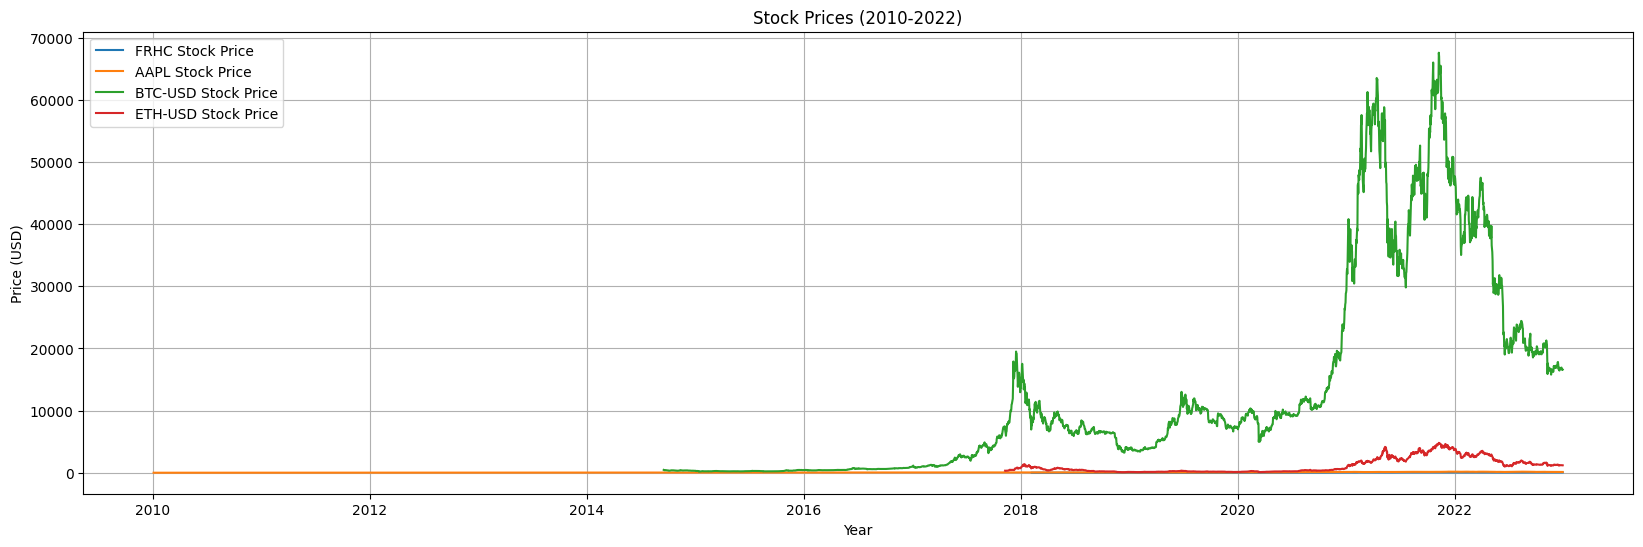

In [ ]:
# Create a figure and set its size
plt.figure(figsize=(20, 6))

# Plot the adjusted close prices for all four datasets
for symbol in stock_symbols:
    plt.plot(stock_data[symbol]['Adj Close'], label=f'{symbol} Stock Price')

# Set the title, labels, legend, and grid
plt.title('Stock Prices (2010-2022)')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

### **Prepare the Data**

In [ ]:
# Create dictionaries to store adjusted closing prices and daily returns for all symbols
stock_prices = {}
daily_returns = {}

# Calculate and store adjusted closing prices and daily returns for all symbols
for symbol in stock_symbols:
    stock_prices[symbol] = stock_data[symbol]['Adj Close']
    daily_returns[symbol] = stock_prices[symbol].pct_change().dropna()

In [ ]:
for symbol in stock_symbols:
    print(f"Adjusted Closing Prices for {symbol}:")
    print(stock_prices[symbol].head())
    print("\n")

Adjusted Closing Prices for FRHC:
Date
2018-02-07    8.0
2018-02-08    7.8
2018-02-09    7.8
2018-02-12    7.8
2018-02-13    7.9
Name: Adj Close, dtype: float64


Adjusted Closing Prices for AAPL:
Date
2010-01-04    6.487535
2010-01-05    6.498750
2010-01-06    6.395378
2010-01-07    6.383555
2010-01-08    6.425995
Name: Adj Close, dtype: float64


Adjusted Closing Prices for BTC-USD:
Date
2014-09-17    457.334015
2014-09-18    424.440002
2014-09-19    394.795990
2014-09-20    408.903992
2014-09-21    398.821014
Name: Adj Close, dtype: float64


Adjusted Closing Prices for ETH-USD:
Date
2017-11-09    320.884003
2017-11-10    299.252991
2017-11-11    314.681000
2017-11-12    307.907990
2017-11-13    316.716003
Name: Adj Close, dtype: float64




### **Train a Model**

In [ ]:
# Create a dictionary to store models for each dataset
models = {}

for symbol in stock_symbols:
    # Create a DataFrame with the date and the adjusted closing prices
    df = pd.DataFrame({'Date': stock_prices[symbol].index, 'Price': stock_prices[symbol].values})
    df = df.set_index('Date')

    # Create a feature: lagged prices
    df['Price_Lagged'] = df['Price'].shift(1)
    df = df.dropna()

    # Define the independent variable (X) and the dependent variable (y)
    X = df['Price_Lagged'].values.reshape(-1, 1)
    y = df['Price'].values

    # Fit a linear regression model for the current symbol
    model = LinearRegression()
    model.fit(X, y)

    # Store the model in the dictionary
    models[symbol] = model

### **Monte Carlo Simulation**

In [ ]:
# Define the initial investments for each symbol
initial_investments = {
    'FRHC': 30000,
    'AAPL': 30000,
    'BTC-USD': 20000,
    'ETH-USD': 20000
}

# Number of simulations
num_simulations = 50

# Number of trading days in a year
trading_days_per_year = 252

# Number of years for the simulation
simulation_years = 10

# Start year
start_year = 2024
end_year = start_year + simulation_years

# Create dictionaries to store portfolio values over time for each symbol
portfolio_values = {}

for symbol in stock_symbols:
    annual_portfolio_values = np.zeros((num_simulations, simulation_years + 1))

    for i in range(num_simulations):
        # Calculate expected return and volatility for a year
        daily_returns = stock_data[symbol]['Adj Close'].pct_change().dropna()
        expected_return = daily_returns.mean() * trading_days_per_year
        volatility = daily_returns.std() * np.sqrt(trading_days_per_year)

        # Simulate annual returns for the next 10 years using a random normal distribution
        annual_returns = np.random.normal(expected_return, volatility, simulation_years)

        # Set the initial investment based on the symbol
        initial_investment = initial_investments[symbol]
        annual_portfolio_values[i, 0] = initial_investment

        # Calculate the portfolio value over the next 10 years
        for year in range(simulation_years):
            year_return = annual_returns[year]
            annual_portfolio_values[i, year + 1] = annual_portfolio_values[i, year] * (1 + year_return)

    portfolio_values[symbol] = pd.DataFrame(annual_portfolio_values, columns=range(start_year, end_year + 1))

### **Visualize the Results**

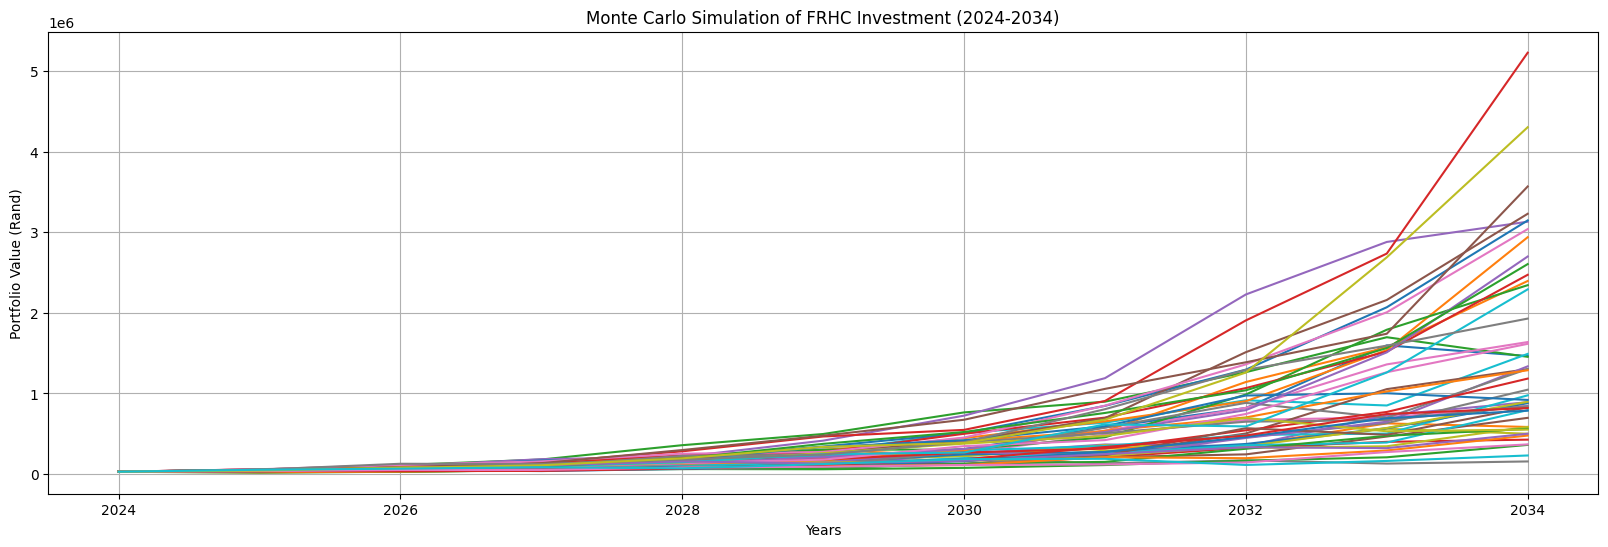

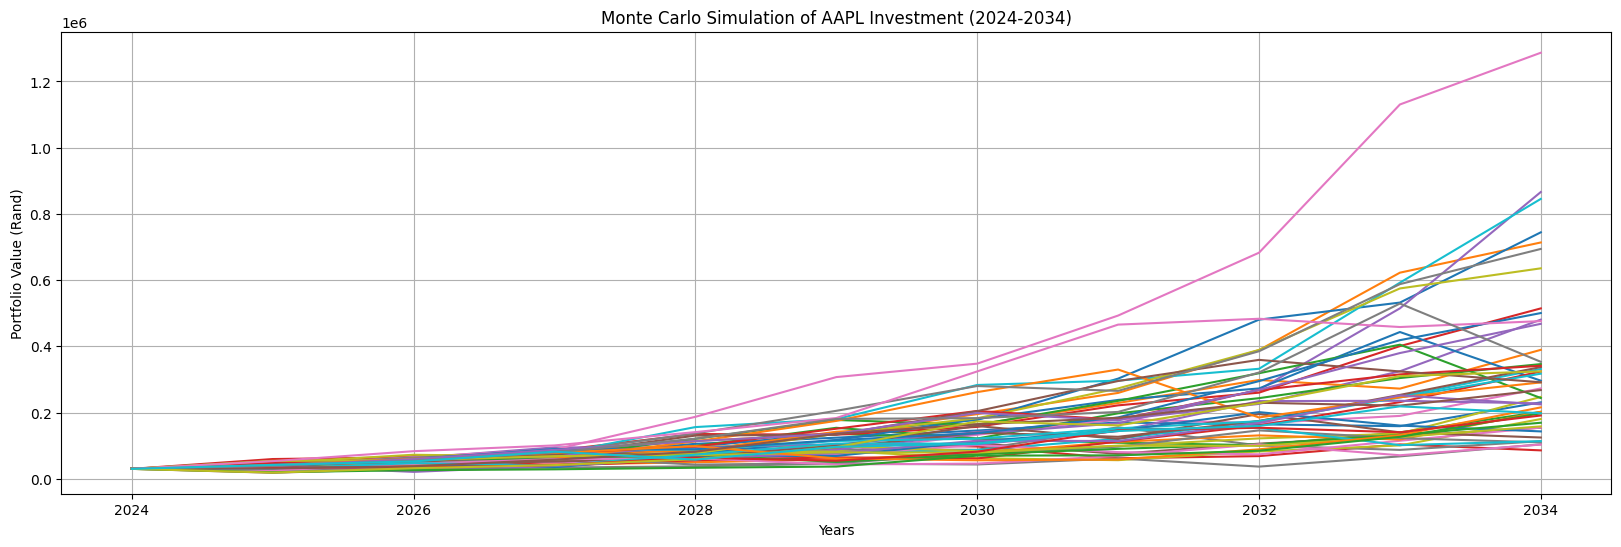

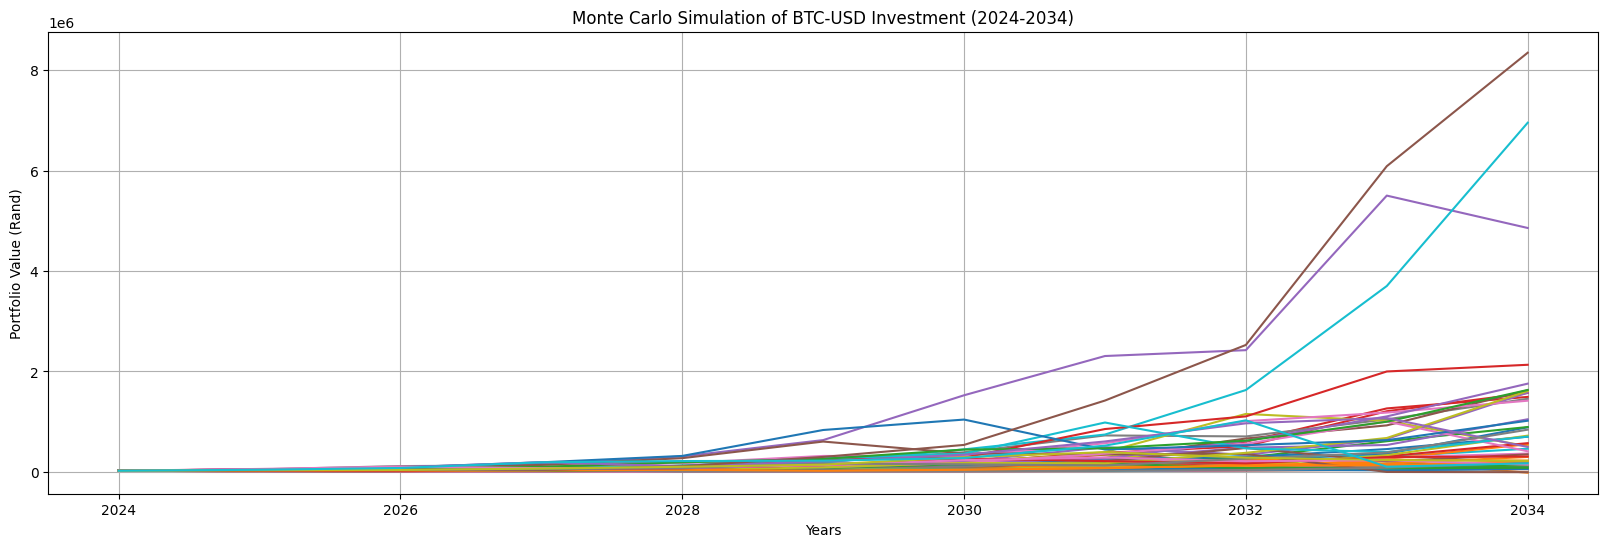

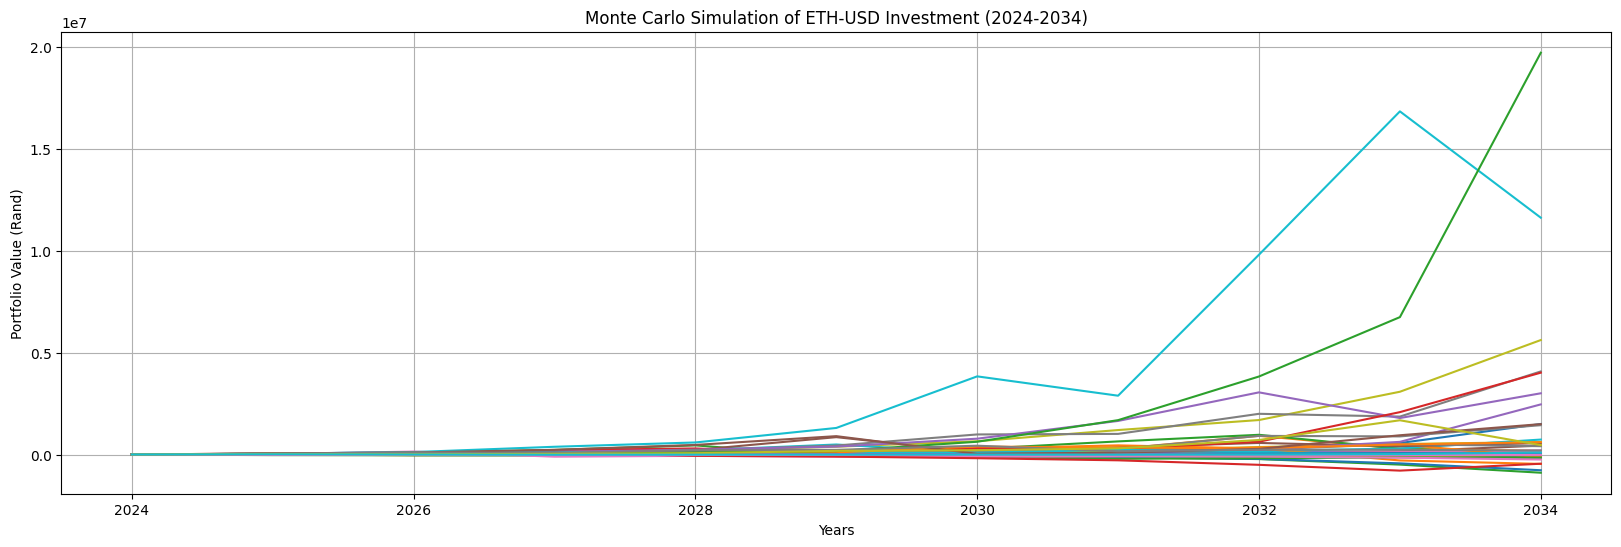

In [ ]:
for symbol in stock_symbols:
    plt.figure(figsize=(20, 6))
    for i in range(num_simulations):
        years = range(start_year, end_year + 1)
        plt.plot(years, portfolio_values[symbol].iloc[i, :], label=f'Simulation {i + 1}')

    plt.xlabel("Years")
    plt.ylabel("Portfolio Value (Rand)")
    plt.title(f"Monte Carlo Simulation of {symbol} Investment ({start_year}-{end_year})")
    plt.grid(True)
    plt.show()

In [ ]:
for symbol in stock_symbols:
    print(f"Results for {symbol}:")
    # # Calculate the final portfolio values at the end of each simulation
    # port = portfolio_values[symbol]  # Access the portfolio values for the current symbol
    # final_portfolio_values = port[:, -1]

    # # Calculate the lowest, highest, and average returns for the current symbol
    # lowest_return = np.min(final_portfolio_values)
    # highest_return = np.max(final_portfolio_values)
    # average_return = np.mean(final_portfolio_values)

    # # Display the results for each symbol
    # print(f"Results for {symbol}:")
    # print(f"Initial Investment: {initial_investments[symbol]:,.2f} Rand")
    # print(f"Lowest Return: {lowest_return:,.2f} Rand")
    # print(f"Average Return: {average_return:,.2f} Rand")
    # print(f"Highest Return: {highest_return:,.2f} Rand")
    # print("\n")

Results for FRHC:
Results for AAPL:
Results for BTC-USD:
Results for ETH-USD:


In [ ]:
for symbol in stock_symbols:
    # Calculate the final portfolio values at the end of each simulation
    port = portfolio_values[symbol]
    final_portfolio_values = port.iloc[:, -1]  # Use .iloc for DataFrame indexing

    # Calculate the lowest, highest, and average returns for the current symbol
    lowest_return = np.min(final_portfolio_values)
    highest_return = np.max(final_portfolio_values)
    average_return = np.mean(final_portfolio_values)

    # Display the results for each symbol
    print(f"Results for {symbol}:")
    print(f"Initial Investment: {initial_investments[symbol]:,.2f} Rand")
    print(f"Lowest Return: {lowest_return:,.2f} Rand")
    print(f"Average Return: {average_return:,.2f} Rand")
    print(f"Highest Return: {highest_return:,.2f} Rand")
    print("\n")

Results for FRHC:
Initial Investment: 30,000.00 Rand
Lowest Return: 157,417.24 Rand
Average Return: 1,518,569.30 Rand
Highest Return: 5,225,066.13 Rand


Results for AAPL:
Initial Investment: 30,000.00 Rand
Lowest Return: 85,827.16 Rand
Average Return: 336,117.98 Rand
Highest Return: 1,286,616.99 Rand


Results for BTC-USD:
Initial Investment: 20,000.00 Rand
Lowest Return: -19,772.61 Rand
Average Return: 992,336.68 Rand
Highest Return: 8,351,681.99 Rand


Results for ETH-USD:
Initial Investment: 20,000.00 Rand
Lowest Return: -874,653.08 Rand
Average Return: 1,142,662.85 Rand
Highest Return: 19,723,174.69 Rand




- **Freedom Holding (FRHC) : R 30 000**   

- **Apple Ince (APPL) : R 30 000**

- **Bitcoin USD (CCC:BTC-USD) : R 20 000**

- **Ethereum USD (CCC:ETH-USD) : R 20 000**






